In [1]:
import sys
sys.path.append("..")
%load_ext autoreload
%autoreload 2
import cbc, numpy as np, scipy as sp, matplotlib.pyplot as plt

In [2]:
waist = 4e-6
wavelength = 1.5e-7
a, b, c = 2e-6, 2.5e-6, 1e-5
Nx, Ny, Nz = 10, 10, 2
detNx, detNy = 128, 128
pix_size = 55e-3
det_dist = 30
knum = 5000

In [3]:
gaus = cbc.GausBeam(waist, wavelength)
bessel = cbc.BesselBeam(waist, wavelength)
latarg = cbc.LatArgs(a=a, b=b, c=c, Nx=Nx, Ny=Ny, Nz=Nz)
detarg = cbc.DetArgs(det_dist=det_dist, detNx=detNx, detNy=detNy, pix_size=pix_size)
diffgaus = cbc.Diff(beam=gaus, lat_args=latarg, det_args=detarg)
diffbessel = cbc.Diff(beam=bessel, lat_args=latarg, det_args=detarg)

# Henry's equations and convolution equations comparison

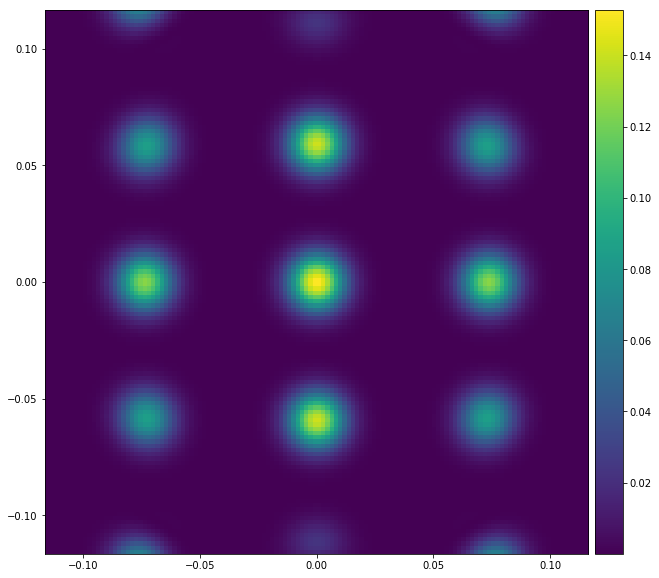

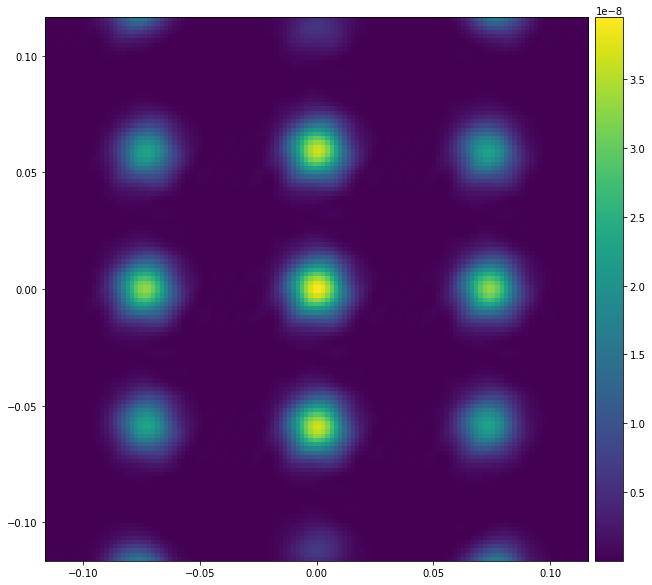

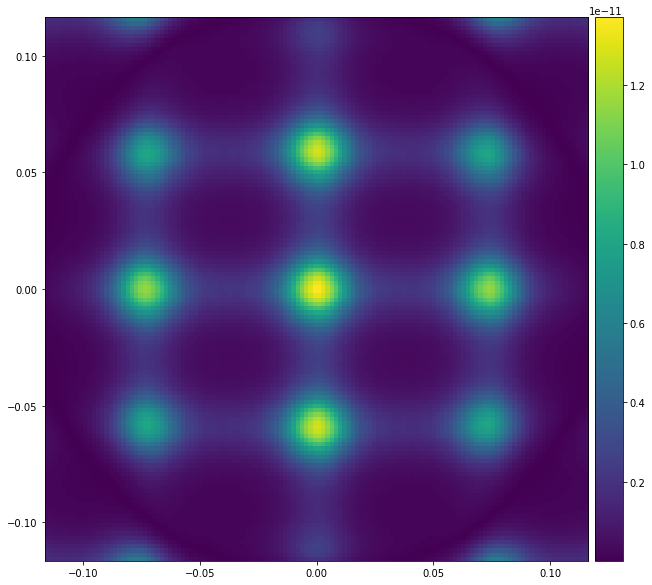

In [4]:
%matplotlib inline
resg1 = diffgaus.henry().pool()
resg2 = diffgaus.conv(knum).pool()
resg3 = diffgaus.nocoh(knum).pool()
resg1.plot()
resg2.plot()
resg3.plot()

#  Incoming Bessel beam

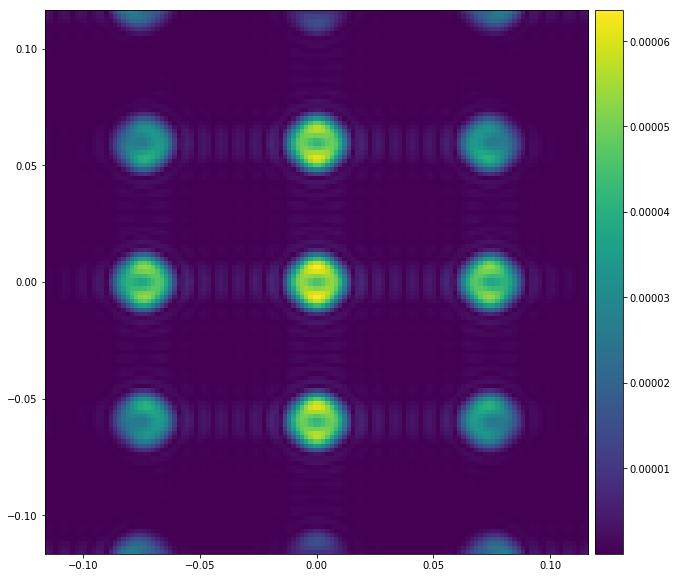

In [4]:
%matplotlib inline
resb1 = diffbessel.henry().pool()
resb1.plot()

# Waist radius less than unit cell size

In [4]:
waist = 1.5e-6
wavelength = 1.5e-7
a, b, c = 2e-6, 2.5e-6, 3e-6
Nx, Ny, Nz = 40, 40, 4
detNx, detNy = 512, 512
pix_size = 55e-3 / 2
det_dist = 30

In [5]:
gaus2 = cbc.GausBeam(waist, wavelength)
bessel2 = cbc.BesselBeam(waist, wavelength)
latarg2 = cbc.LatArgs(a=a, b=b, c=c, Nx=Nx, Ny=Ny, Nz=Nz)
detarg2 = cbc.DetArgs(det_dist=det_dist, detNx=detNx, detNy=detNy, pix_size=pix_size)
diffgaus2 = cbc.Diff(beam=gaus2, lat_args=latarg2, det_args=detarg2)
diffbessel2 = cbc.Diff(beam=bessel2, lat_args=latarg2, det_args=detarg2)

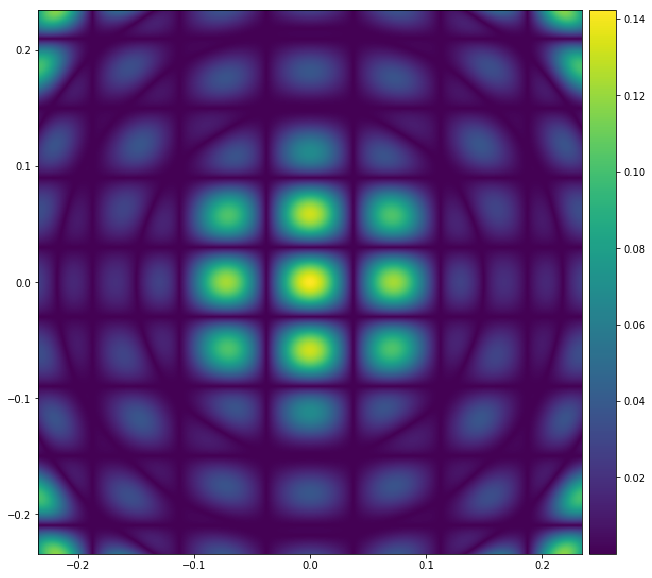

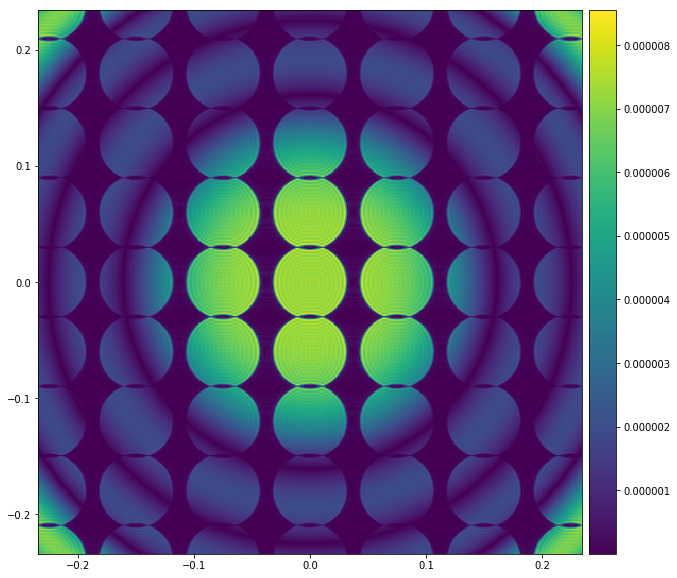

In [6]:
resg4 = diffgaus2.henry().pool()
resb2 = diffbessel2.henry().pool()
resg4.plot()
resb2.plot()

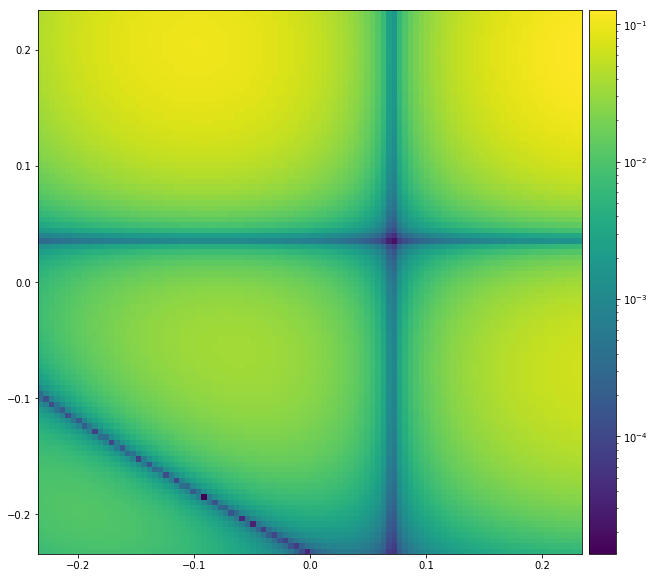

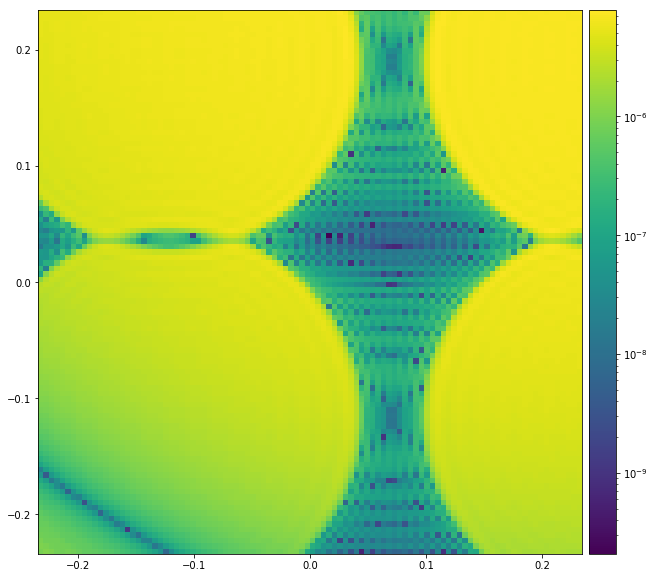

In [12]:
resg4.logplot(xlim=(150,250), ylim=(100,200))
resb2.logplot(xlim=(150,250), ylim=(100,200))

# Moving the sample downstream

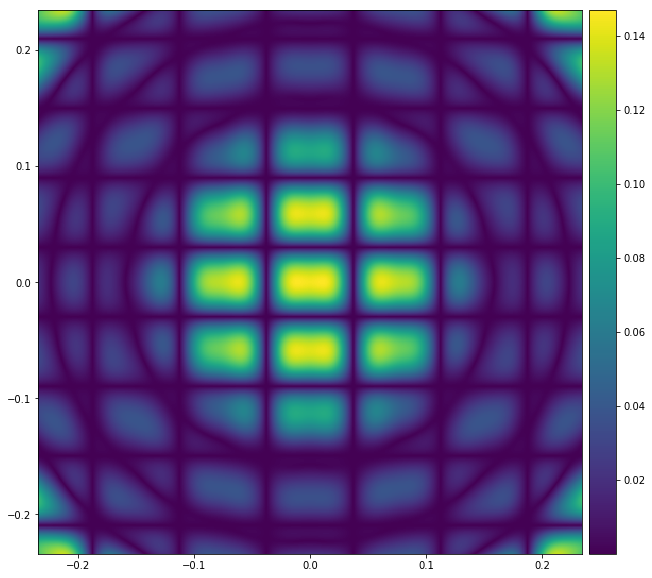

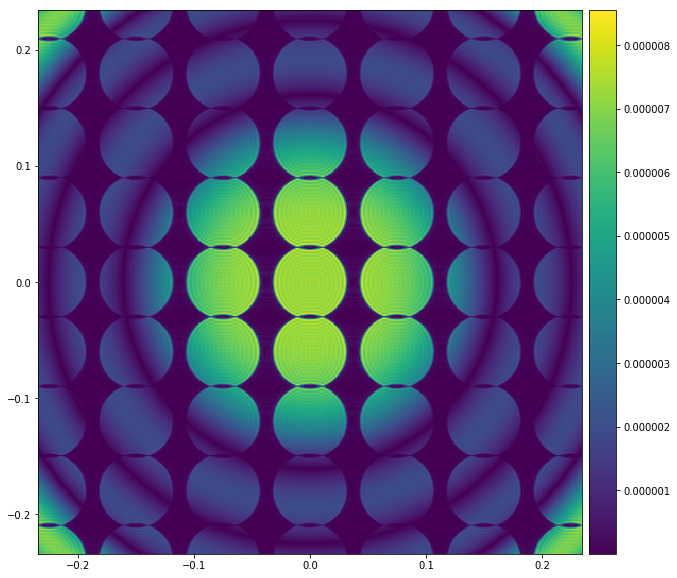

In [13]:
zr = np.pi * waist**2 / wavelength
diffgaus2.move_lat(zr)
diffbessel2.move_lat(zr)
resg5 = diffgaus2.henry().pool()
resb3 = diffbessel2.henry().pool()
resg5.plot()
resb3.plot()